In [1]:
source('../setup.r');

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



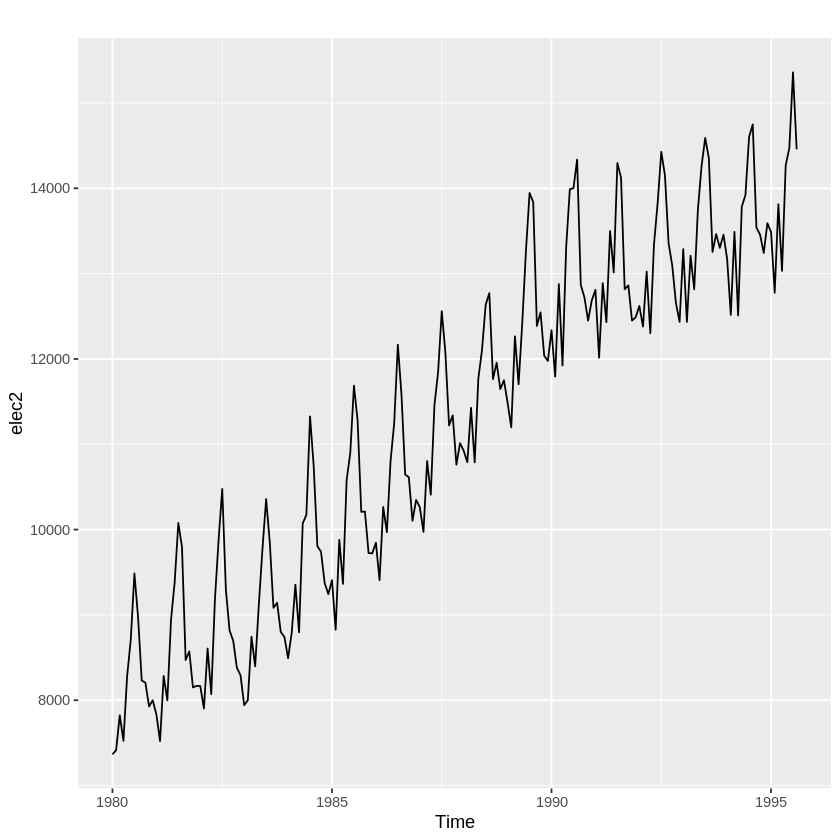

In [2]:
elec2 <- window(elec, start=1980)
autoplot(elec2)

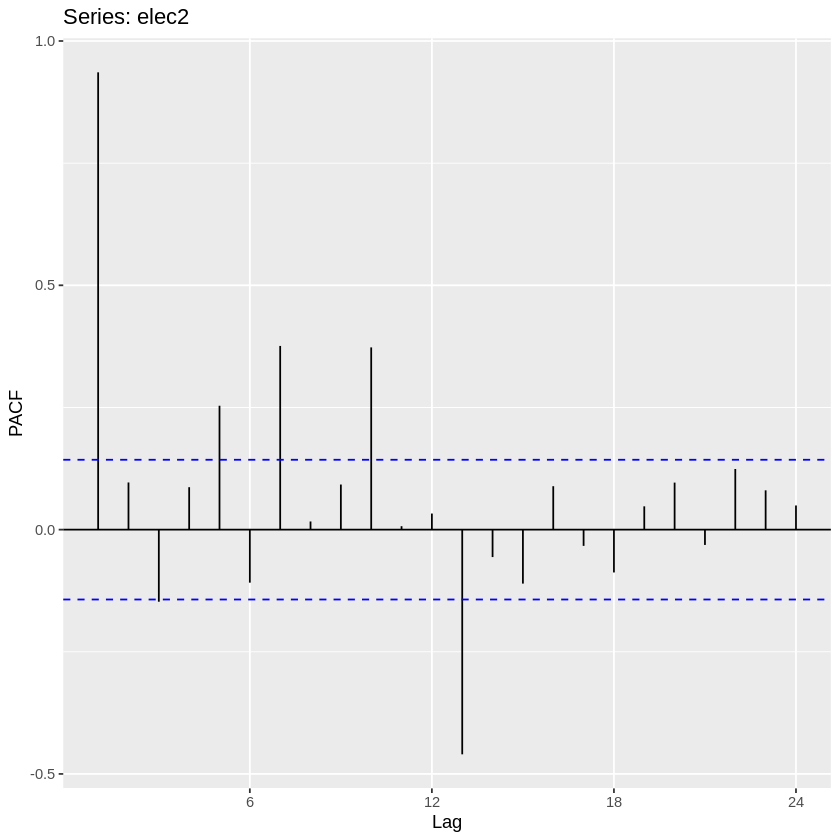

In [3]:
ggPacf(elec2)

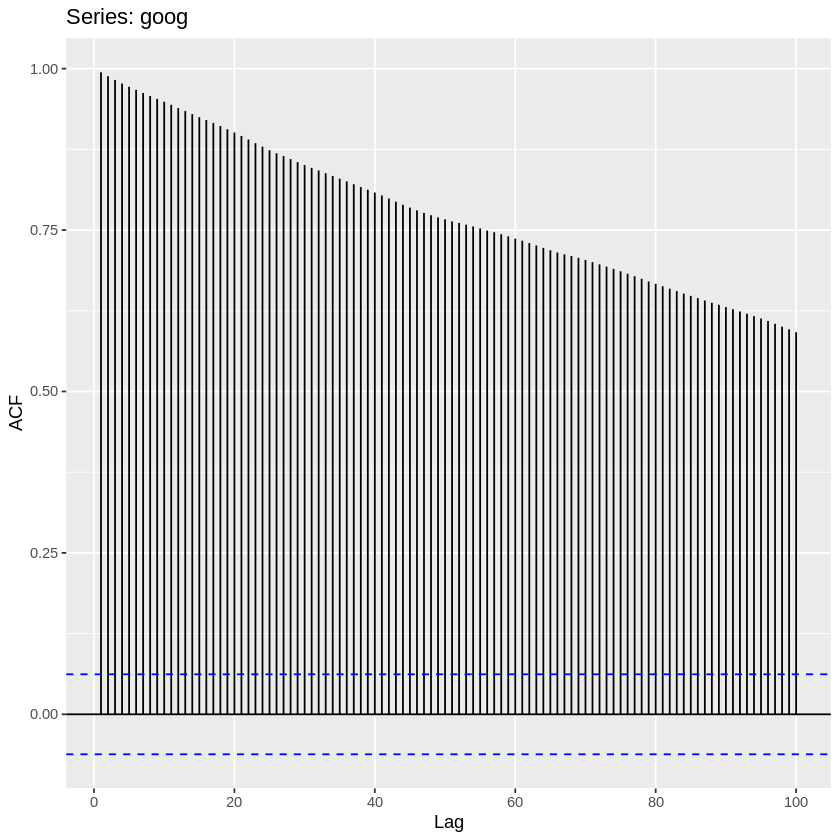

In [4]:
ggAcf(goog, lag.max=100)

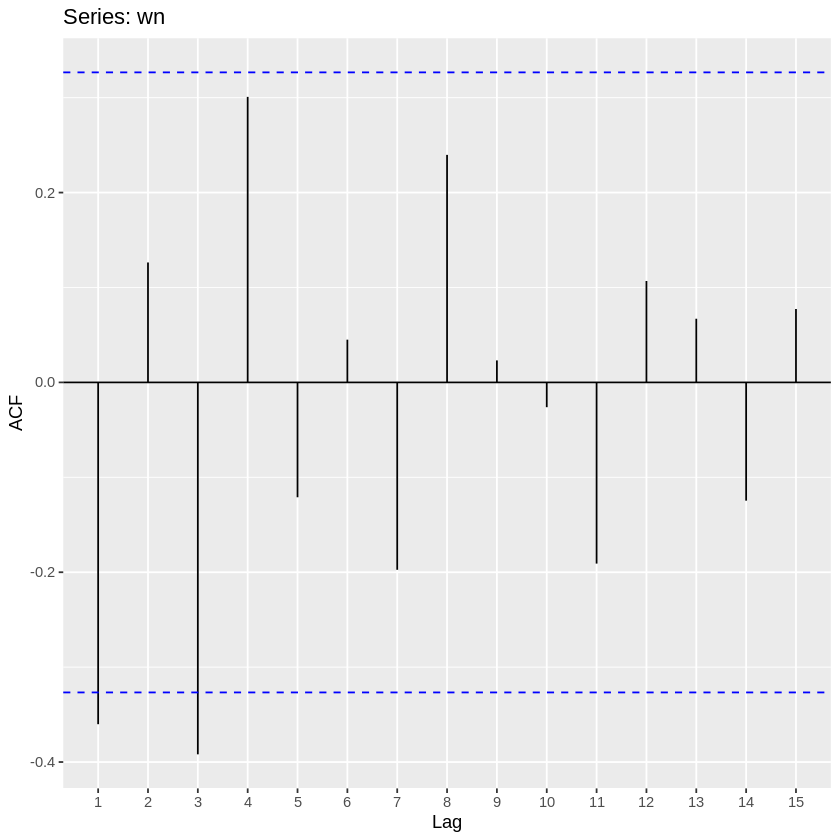

In [5]:
wn <- ts(rnorm(36))
ggAcf(wn)

## Exercise 1

In [6]:
dgoog <- diff(goog)

`diff` provides $y^' = y_t - y_{t-1}$

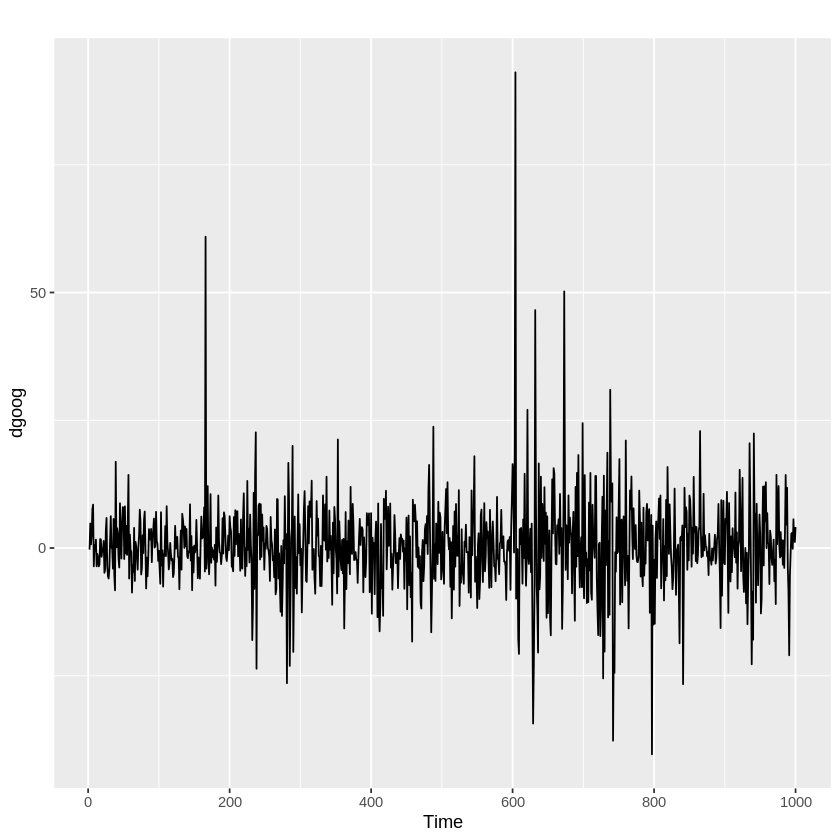

In [7]:
autoplot(dgoog)

This looks like a random walk - so you **can't predict stock options**

In [8]:
mean(dgoog)

[1] 0.4212612

# simple predictions in time series

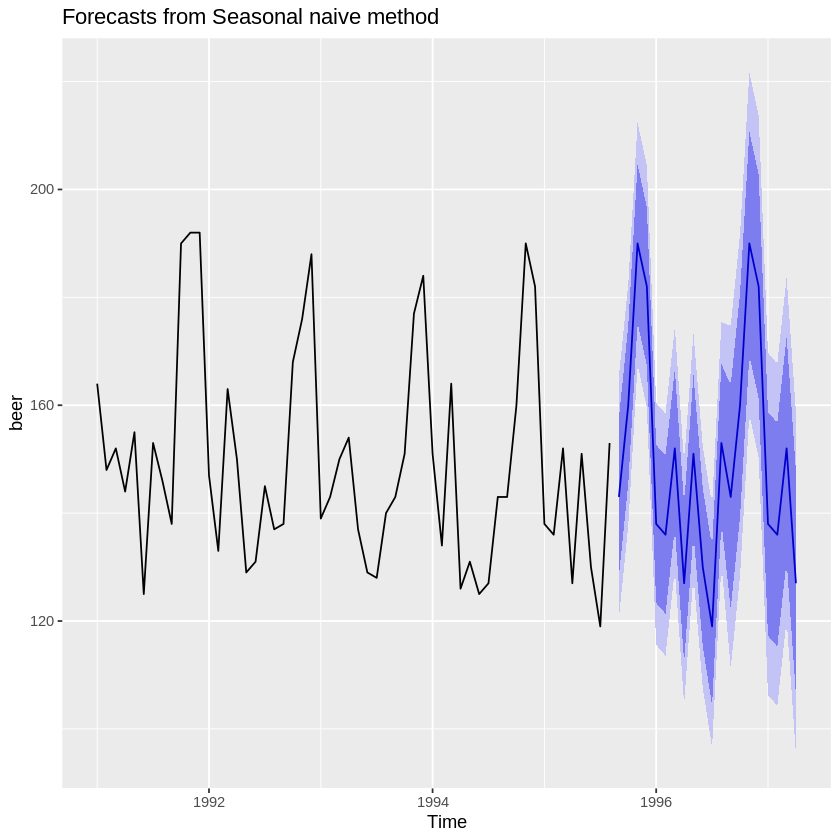

In [9]:
fc <- snaive(beer, h=20)
autoplot(fc)

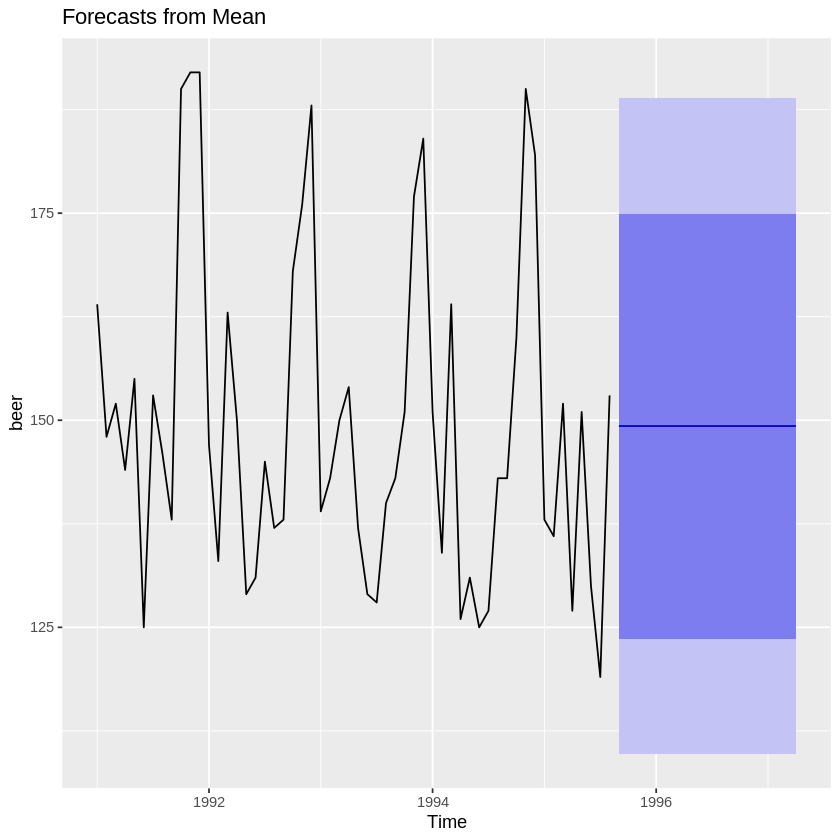

In [10]:
fc <- meanf(beer, h=20)
autoplot(fc)

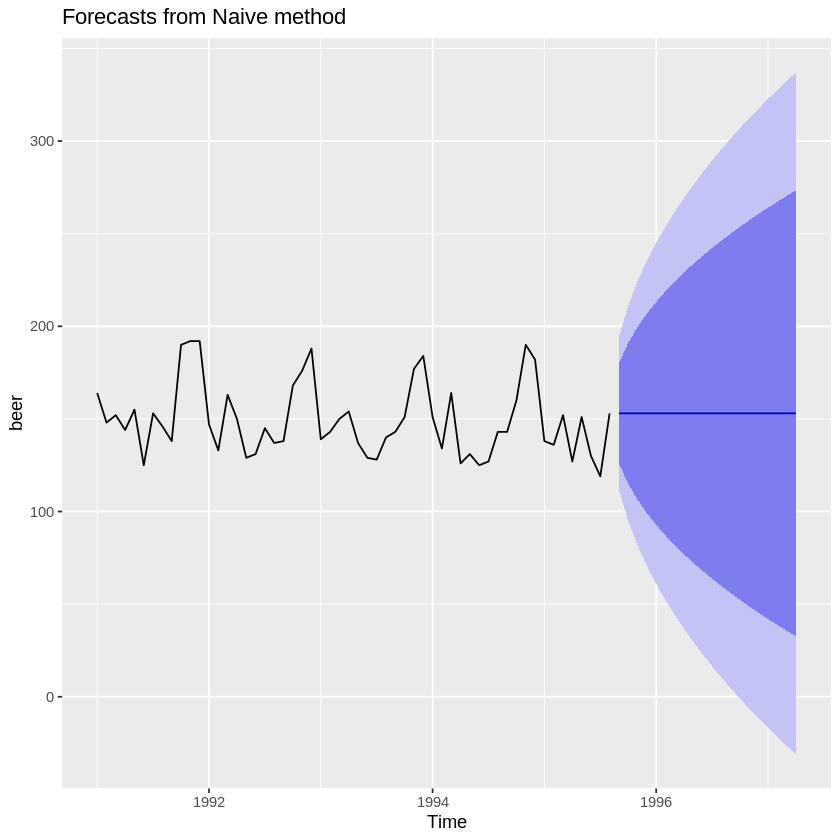

In [11]:
fc <- naive(beer, h=20)
autoplot(fc)

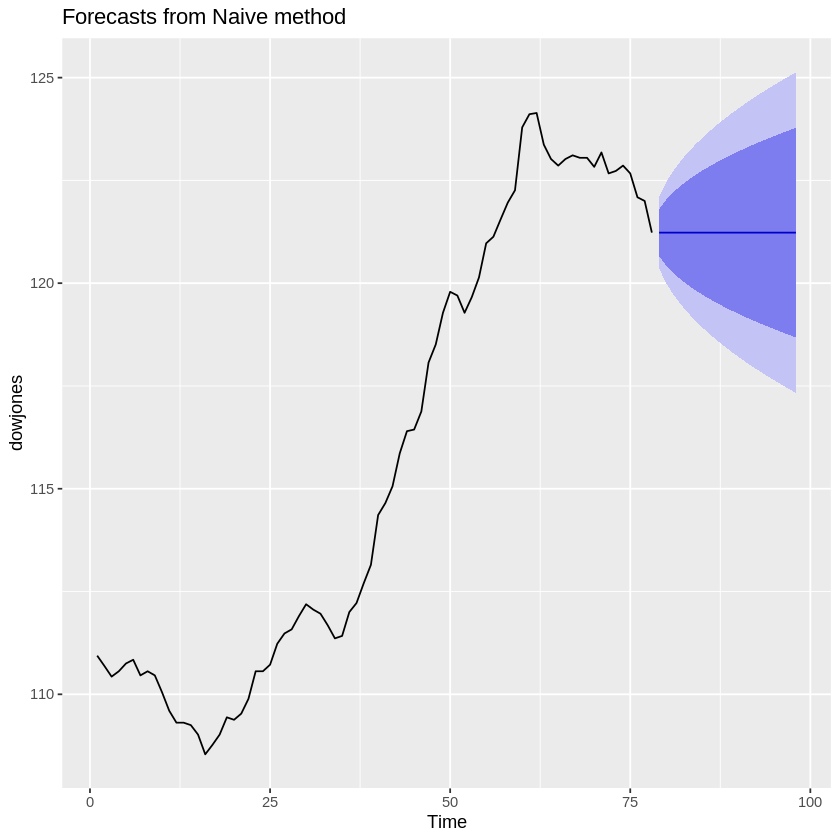

In [12]:
fc <- naive(dowjones, h=20)
autoplot(fc)

`rwf` stands for **r**andom **w**alk **f**orecast

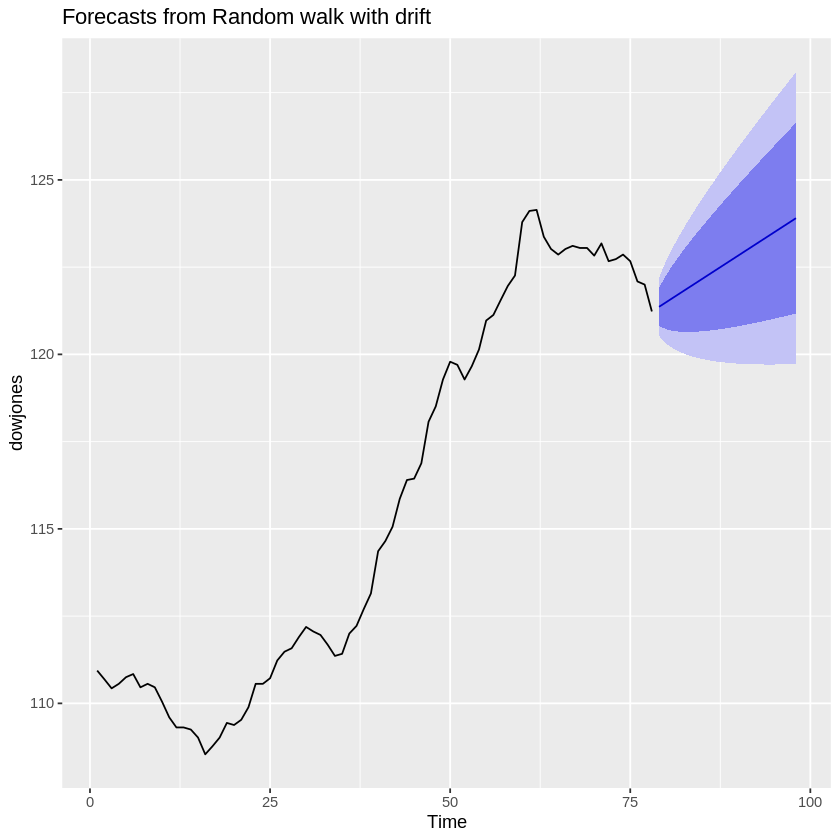

In [13]:
fc <- rwf(dowjones, drift=TRUE, h=20)
autoplot(fc)

Use
- Mean `meanf`
- Naive `naive`
- Seasonal naive `snaive`
- drift `rwf`

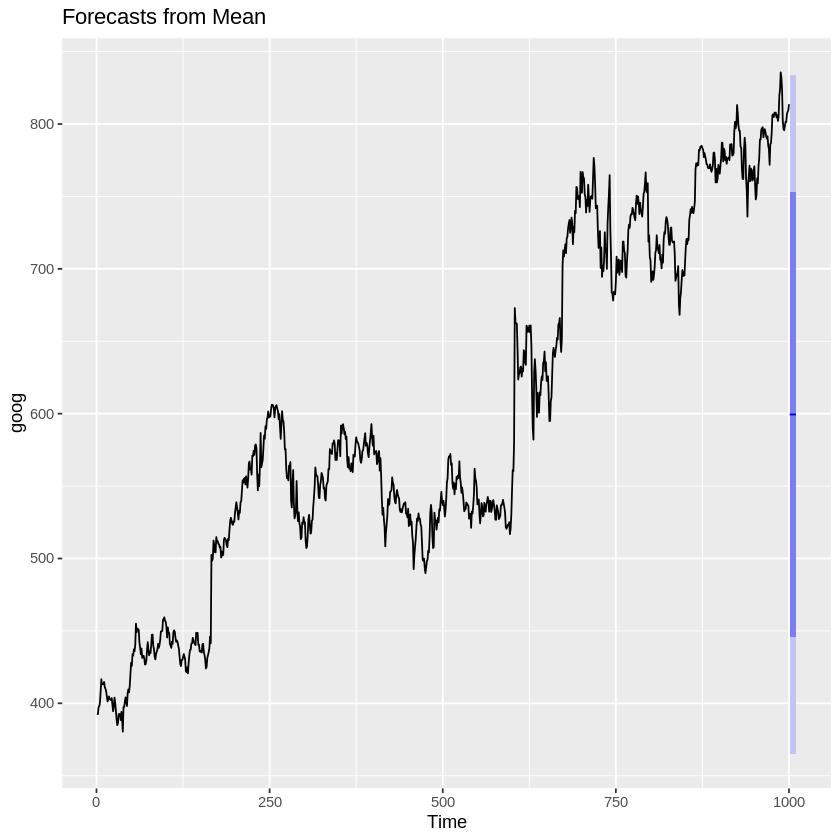

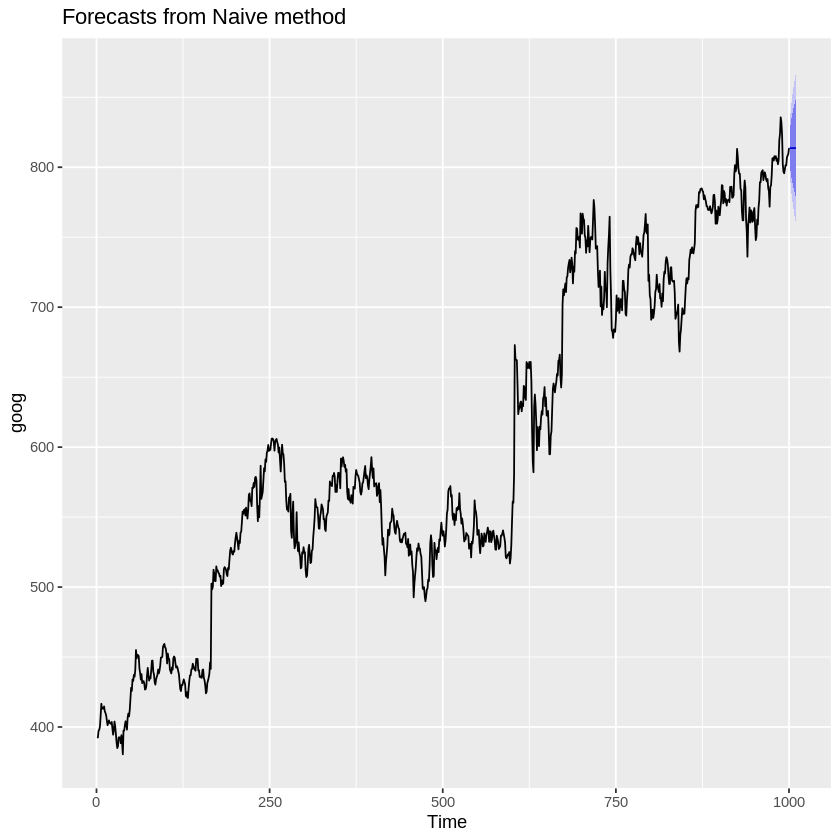

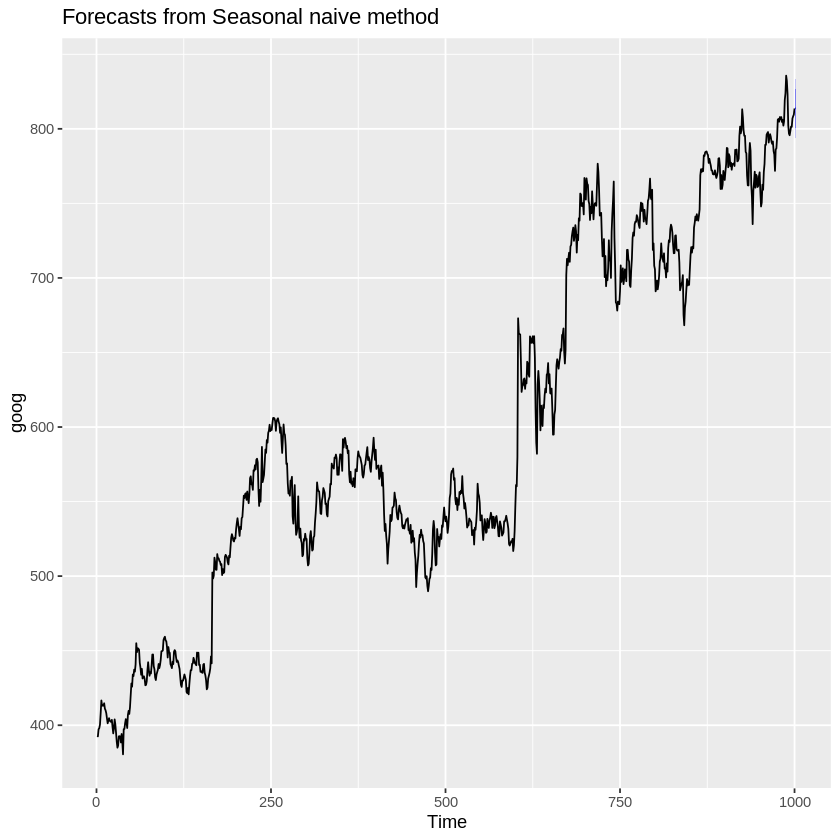

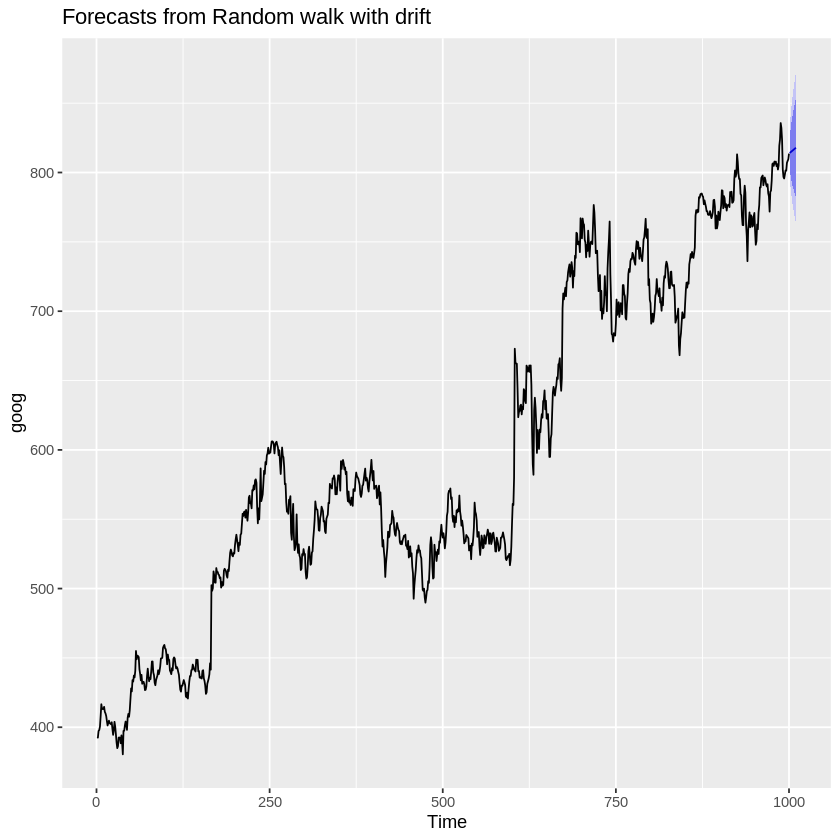

In [14]:
autoplot(meanf(goog))
autoplot(naive(goog))
autoplot(snaive(goog))
autoplot(rwf(goog, drift=TRUE))

# Residuals

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


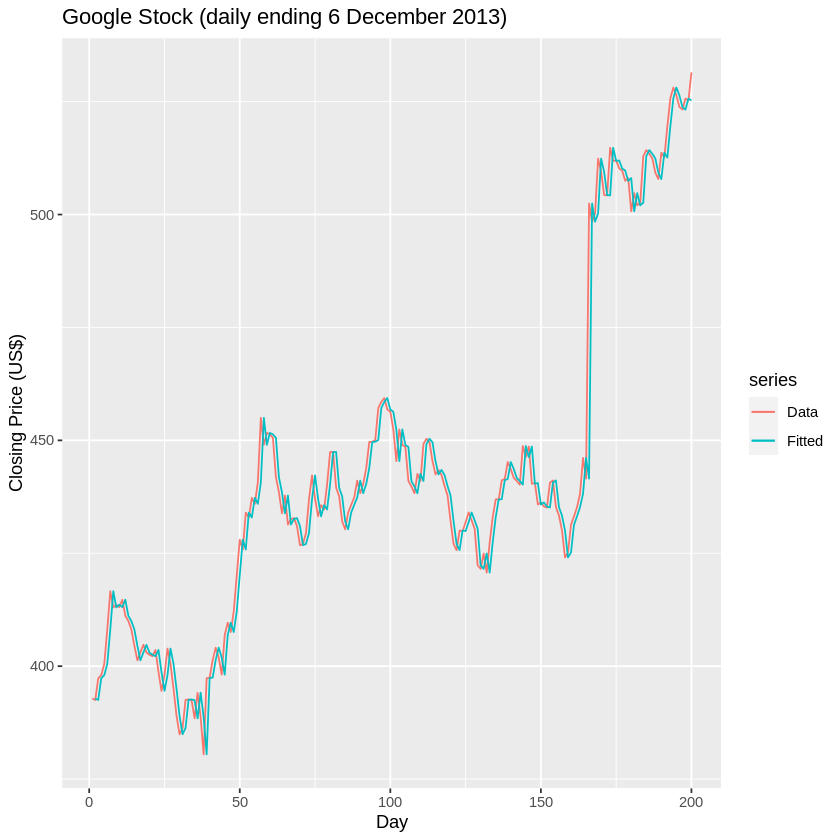

In [15]:
fits <- fitted(naive(goog200))
autoplot(goog200, series="Data") + autolayer(fits, series="Fitted") + xlab("Day") + ylab("Closing Price (US$)") + ggtitle("Google Stock (daily ending 6 December 2013)")

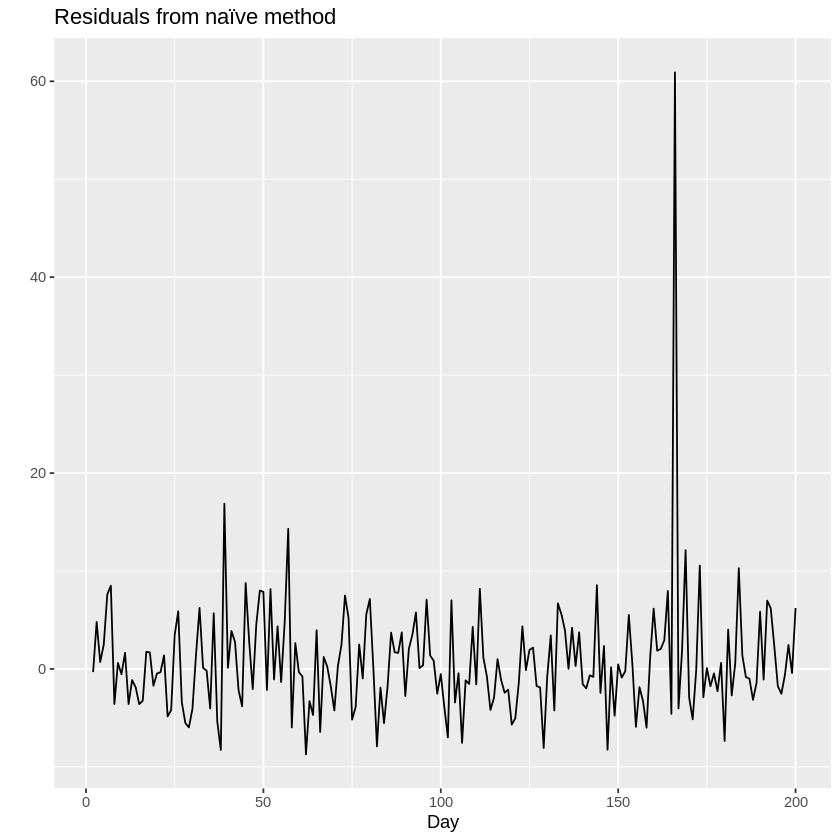

In [16]:
res <- residuals(naive(goog200))
autoplot(res) + xlab("Day") + ylab("") + ggtitle("Residuals from naïve method")

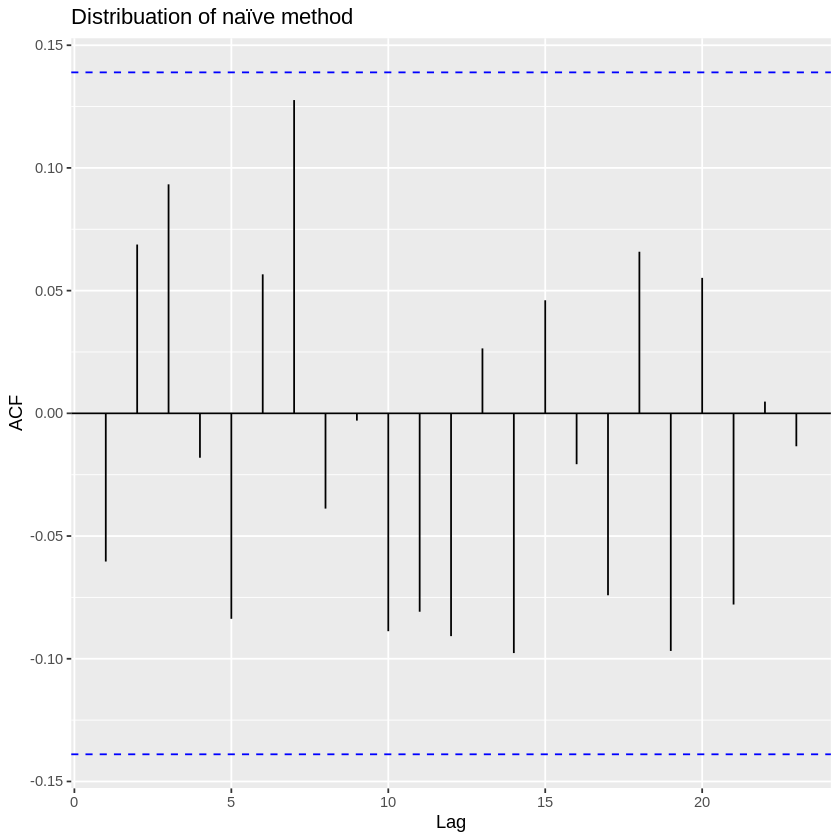

In [17]:
ggAcf(res) + ggtitle("Distribuation of naïve method")

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


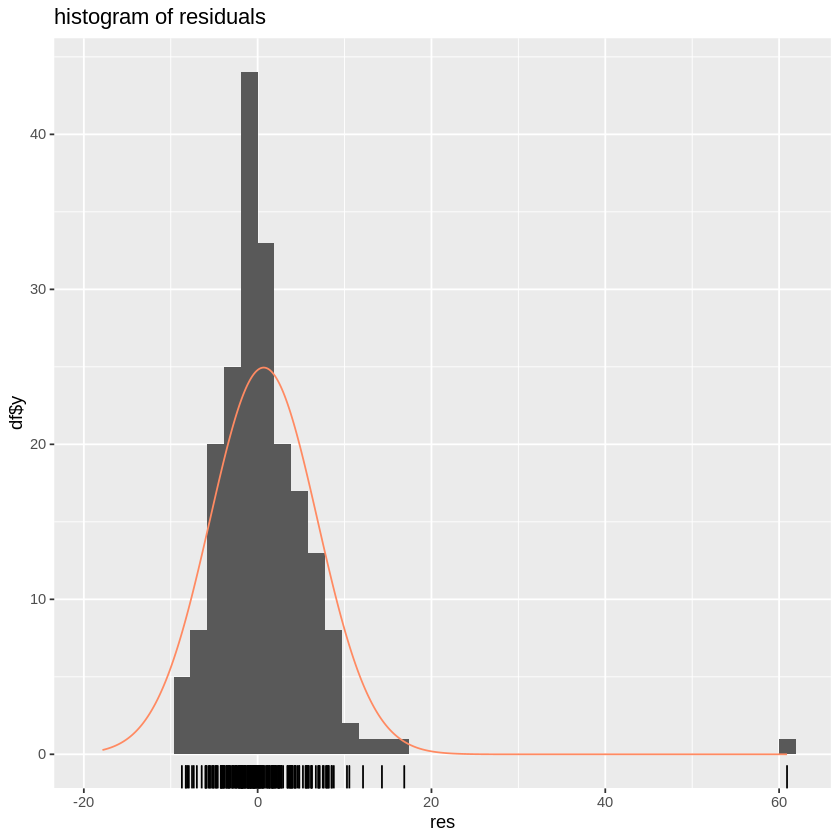

In [18]:
gghistogram(res, add.normal=TRUE) + ggtitle("histogram of residuals")

# Ljung-Box test

In [19]:
Box.test(res, lag=10, fitdf=0, type="Lj")


	Box-Ljung test

data:  res
X-squared = 11.031, df = 10, p-value = 0.3551


Value is not close to 0.05 (5%) which means the residuals are not white noise!

To get all information with one line of code, use `checkresiduals`


	Ljung-Box test

data:  Residuals from Naive method
Q* = 11.031, df = 10, p-value = 0.3551

Model df: 0.   Total lags used: 10



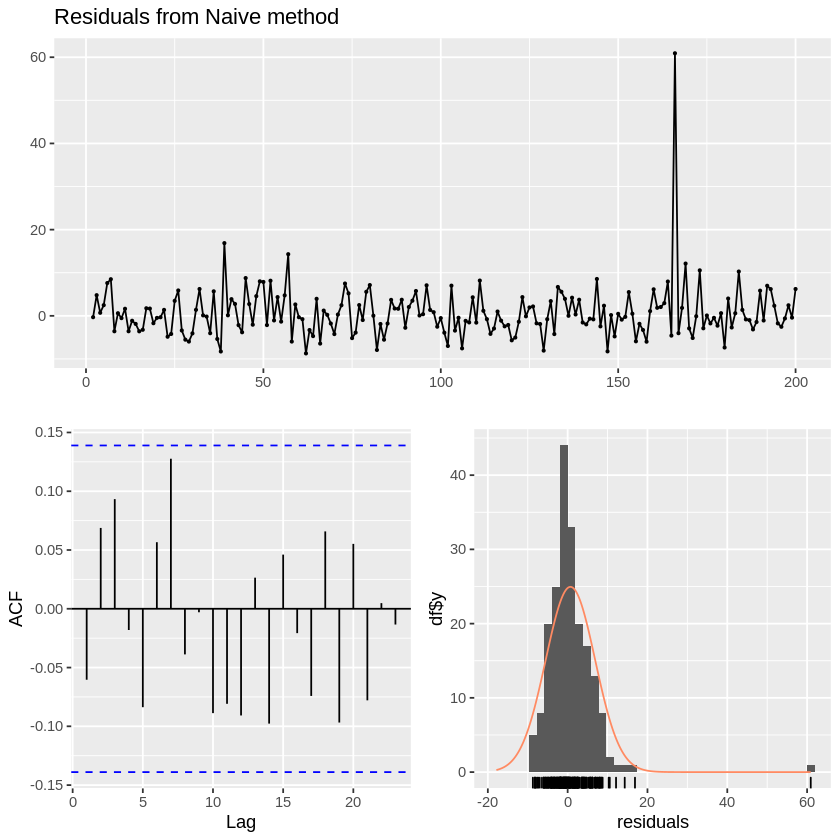

In [20]:
checkresiduals(naive(goog200))

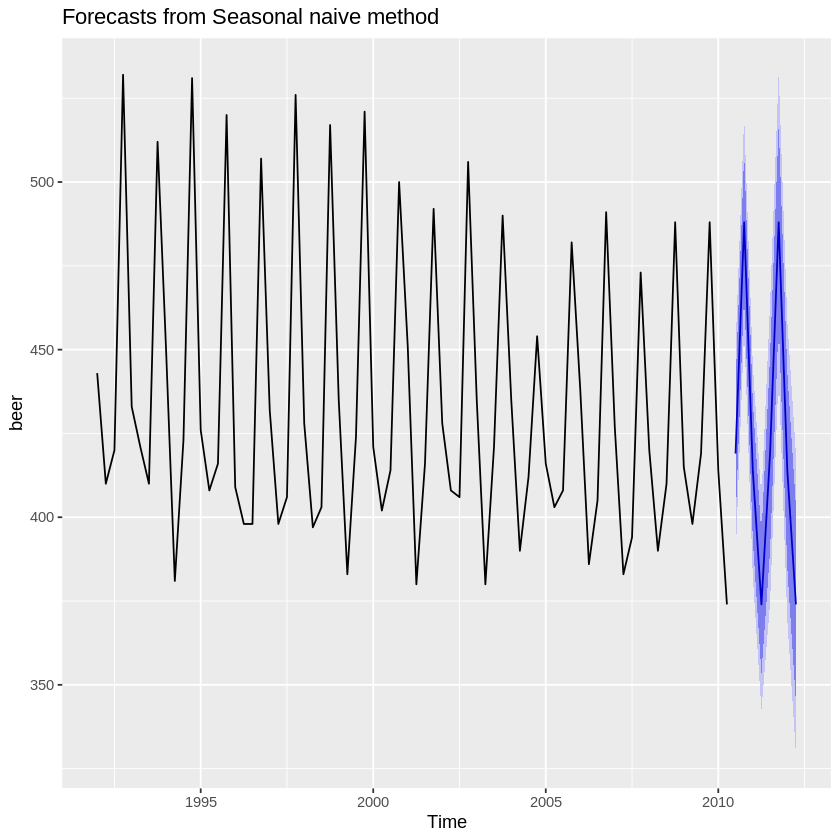

In [21]:
beer <- window(ausbeer, start=1992)
fc <- snaive(beer)
autoplot(fc)


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 32.269, df = 8, p-value = 8.336e-05

Model df: 0.   Total lags used: 8



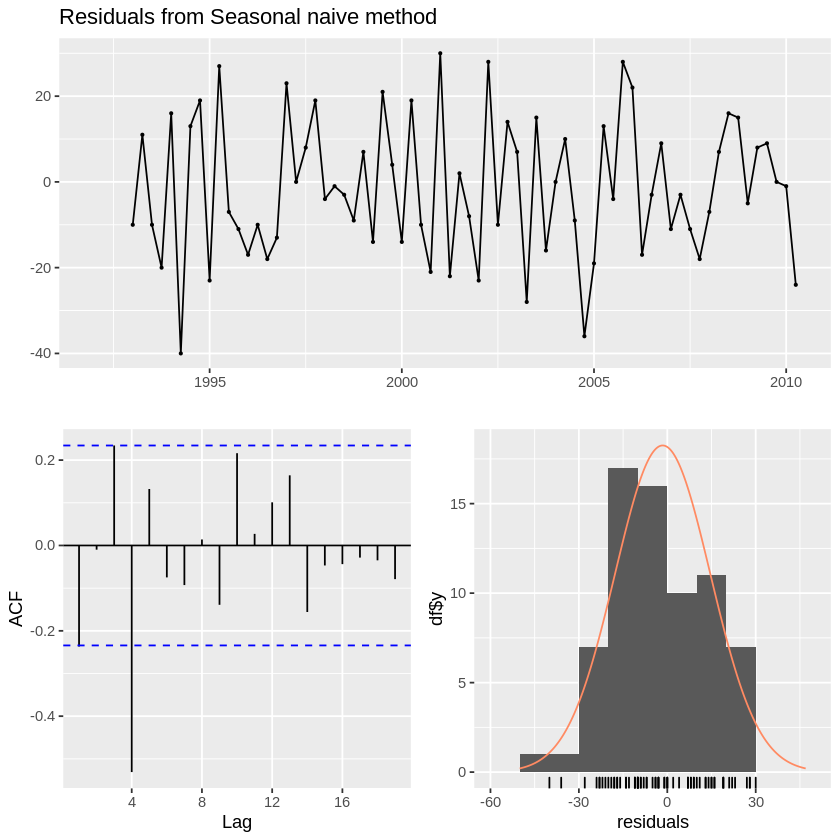

In [22]:
checkresiduals(fc)

This p value says that it is not white noise!!! p-Value = 0.00008
### **Reject the white noise hypothosis**